# **JOB MARKET IN THE USA**



### Importing Necessary Libraries



> General



In [ ]:
import pandas as pd
import numpy as np



> For plots



In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors



> NLP



In [ ]:
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
import math
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.stem import PorterStemmer

## **Data Loading**




> Creating a data loader to upload the data







*   This may be slow, You can directly upload the data 





In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#@title For path of the data
path = "/content/final_job_data.csv" #@param {type:"string"}
# reading the data to a data frame

df = pd.read_csv(path)

# printing the first 10 rows of the data
df.head(10)

,position,company,description,reviews,City,State
0,Data Scientist,LIVE OBJECTS,About Live Objects\nLive Objects delivers cont...,NaN,Palo Alto,CA
1,"Senior Data Scientist, FP&A",The J. M. Smucker Company,"The Senior Data Scientist, FP&A role is primar...",393.0,Orrville,OH
2,BI Developer (Tableau),Vaco,**U.S. Citizens and those authorized to work i...,272.0,Charlotte,NC
3,Search & Information Retrieval Engineer / Scie...,Apple,"Summary\nPosted: Jul 29, 2020\nRole Number:200...",9782.0,Santa Clara Valley,CA
4,Machine Learning Engineer,Sisu,"At Sisu, we're building a software platform th...",8.0,San Francisco,CA
5,Database Administrator,"Galapagos Federal Systems, LLC",The Database Administrator is responsible for ...,NaN,Omaha,NE
6,"Autopilot, Deep Learning Engineer/Scientist",Tesla,The Role\nAs a member of the Autopilot AI team...,4469.0,Palo Alto,CA
7,Beta Program Manager,Skydio,Skydio is the world leader in autonomous fligh...,2.0,Redwood City,CA
8,"Machine Learning Modeler, Growth",Square,Company Description\n\nSquare builds common bu...,100.0,Oakland,CA
9,Senior Data Engineer,Polarr,Polarr is looking for Data Engineer to ensure ...,NaN,San Jose,CA


## **Data Preprocessing**

In [ ]:
# observing the shape of the data 

df.shape

(14711, 6)

In [ ]:
# observing the null values in the data

df.isnull().sum()

position         25
company         186
description     259
reviews        5083
City             46
State          1339
dtype: int64



> As the reviews column has the more number of null values if we drop reviews we loose more amount of data, so instead of dropping null values directly we are dropping the reviews column for now and creating a new data frame










In [ ]:
# creating a new data frame with out reviews

df_new = df.drop(['reviews'],axis=1)

df_new

,position,company,description,City,State
0,Data Scientist,LIVE OBJECTS,About Live Objects\nLive Objects delivers cont...,Palo Alto,CA
1,"Senior Data Scientist, FP&A",The J. M. Smucker Company,"The Senior Data Scientist, FP&A role is primar...",Orrville,OH
2,BI Developer (Tableau),Vaco,**U.S. Citizens and those authorized to work i...,Charlotte,NC
3,Search & Information Retrieval Engineer / Scie...,Apple,"Summary\nPosted: Jul 29, 2020\nRole Number:200...",Santa Clara Valley,CA
4,Machine Learning Engineer,Sisu,"At Sisu, we're building a software platform th...",San Francisco,CA
...,...,...,...,...,...
14706,Software Engineer I,"Stratus Technologies, Inc.15 reviewsMaynard, M...","Stratus’ Edge Computing platforms enables OT,...",Maynard,MA 01754
14707,"Senior Machine Learning Engineer, Data Science...","Even FinancialNew York, NYRemote","Founded in 2014, Even Financial is a B2B finte...",Remote,NaN
14708,"Analytics Engineer, Data Science | Bankrate","Red Ventures743 reviewsAustin, TXRemote",About the role\n We are looking to hire an ana...,Remote,NaN
14709,Data Scientist Machine Learning Engineer,"Plasma Computing Group2 reviewsDallas, TX",Primary Responsibilities to Include:\n\nDesign...,Dallas,TX


In [ ]:
# rechecking the null values

df_new.isnull().sum()

position         25
company         186
description     259
City             46
State          1339
dtype: int64

In [ ]:
# dropping the null values

df_new = df_new.dropna()



> Processing the state column as it has a lot of juncks




In [ ]:
# observing the unique values in the column

df_new['State'].unique()

In [ ]:
# removing the numbers and spaces in the state column

df_new['State'] = df_new['State'].str.replace('\d+', '', regex = True)


<ipython-input-16-67c113868a61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['State'] = df_new['State'].str.replace('\d+', '', regex = True)


In [ ]:
# removing empty spaces from state column

df_new['State'] = df_new['State'].str.strip()

<ipython-input-17-901a80d174c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['State'] = df_new['State'].str.strip()


In [ ]:
# replacing unwanted values with nan

df_new['State'] = df_new['State'].replace('reviews', np.nan)
df_new['State'] = df_new['State'].replace('LLC', np.nan)
df_new['State'] = df_new['State'].replace('Inc.', np.nan)
df_new['State'] = df_new['State'].replace('Los Angeles', np.nan)

# state column after cleaning

df_new['State'].unique()

In [ ]:
# converting the data type to string
df_new['State'] = df_new['State'].astype(str)

In [ ]:
# Checking for any junks in the city column

df_new['City'].unique()

## **Data Visualization**

In [ ]:
# Top 10 companies offering jobs

company = df_new['company'].value_counts().head(10).sort_values(ascending = False).reset_index()

fig = px.bar(company, x='index', y='company', color = 'index', height = 700)
fig.update_layout(
    title="Top 10 companies contributing the jobs in USA",
    xaxis_title="Compay",
    yaxis_title="Number of Positions",
    legend_title="Company",
    font=dict(
        size=14
    ))
fig.show()

In [ ]:
# Observing the top 10 positions
position = df_new['position'].value_counts().head(10).sort_values(ascending = False).reset_index()
position

,index,position
0,Data Scientist,743
1,Sr. Data Scientist,280
2,Sr Data Scientist,242
3,Junior Health Analytics Data Scientist,242
4,Data Engineer,190
5,Machine Learning Engineer,184
6,Senior Data Scientist,169
7,Data Architect,149
8,Lead Data Scientist,129
9,Junior Data Scientist,122




> From the data we can observe that there are so many data scientist jobs with different designation. So, trying to grouping them with the common key words and their postions



In [ ]:
# checking the positions in the data

df_new['position'].unique()

array(['Data Scientist', 'Senior Data Scientist, FP&A',
       'BI Developer (Tableau)', ..., 'Data Scientist Engineer',
       'Engineering Team Lead',
       'GIS Developer - Business Intelligence Engineer, Physical Stores Real Estate'],
      dtype=object)

In [ ]:
# grouping the common jobs

df_group = df_new.copy()
df_group.dropna(subset=['position'], how='all', inplace = True)
df_group['position']=[x.lower() for x in df_group['position']]
df_group['description']=[x.lower() for x in df_group['description']]

df_group.loc[df_group.position.str.contains("data scientist"), 'position'] = 'Data Scientist'
df_group.loc[df_group.position.str.contains('data science'),'position']='Data Scientist'

df_group.loc[df_group.position.str.contains('machine learning engineer'),'position']='Machine Learning Engineer'
df_group.loc[df_group.position.str.contains('machine learning'),'position']='Machine Learning Engineer'
df_group.loc[df_group.position.str.contains('programmer'),'position']='Machine Learning Engineer'
df_group.loc[df_group.position.str.contains('artificial intelligence'),'position']='AI Engineer'

df_group.loc[df_group.position.str.contains('software engineer'),'position']='Software Developer'
df_group.loc[df_group.position.str.contains('developer'),'position']='Software Developer'
df_group.loc[df_group.position.str.contains('software'),'position']='Software Developer'

df_group.loc[df_group.position.str.contains('analyst'), 'position'] = 'Data Analyst'

df_group.loc[df_group.position.str.contains('statistician'), 'position'] = 'Data Engineer'
df_group.loc[df_group.position.str.contains('data engineer'),'position']='Data Engineer'

df_group.loc[df_group.position.str.contains('sql'), 'position'] = 'Database Engineer'
df_group.loc[df_group.position.str.contains('database'), 'position'] = 'Database Engineer'

df_group.loc[df_group.position.str.contains('manager'),'position']='Program Manager'
df_group.loc[df_group.position.str.contains('consultant'),'position']='Program Manager'

df_group.loc[df_group.position.str.contains('director'),'position']='Program Manager'


In [ ]:
# visualising the grouped data with respect to position

position = df_group['position'].value_counts().head(10).sort_values(ascending = False).reset_index()

fig = px.pie(position, values='position', names='index', title='Top 10 job positions in USA')


fig.update_layout(
    legend_title="Positions",
    font=dict(
        size=14
    ))
fig.show()

In [ ]:
# Top 10 states where job opportunities are more

state = df_new['State'].value_counts().head(10).sort_values(ascending = False).reset_index()

fig = px.bar(state, x='index', y='State', color = 'index', height = 700)
fig.update_layout(
    title="Top 10 states where job opportunities are more",
    xaxis_title="State",
    yaxis_title="Number of Jobs",
    legend_title="State",
    font=dict(
        size=14
    ))
fig.show()

### Visualization Using google forms

In [ ]:
#@title Select a position to know in which state the openings are more { run: "auto", display-mode: "both" }

select_position = "Software Developer" #@param ["Data Scientist", "Data Analyst", "Machine Learning Engineer", "Program Manager", "Software Developer", "Data Engineer", "data architect", "Database Engineer", "AI Engineer", "research scientist"]

df_custom = df_group[df_group['position'] == select_position]

state = df_custom['State'].value_counts().head(10).sort_values(ascending = False).reset_index()

fig = px.bar(state, x='index', y='State', color = 'index', height = 700)
fig.update_layout(
    title=f"Top 10 states in USA where {(select_position)} jobs are more",
    xaxis_title="State",
    yaxis_title="Number of Jobs",
    legend_title="State",
    font=dict(
        size=14
    ))
fig.show()




> Word Cloud of different columns



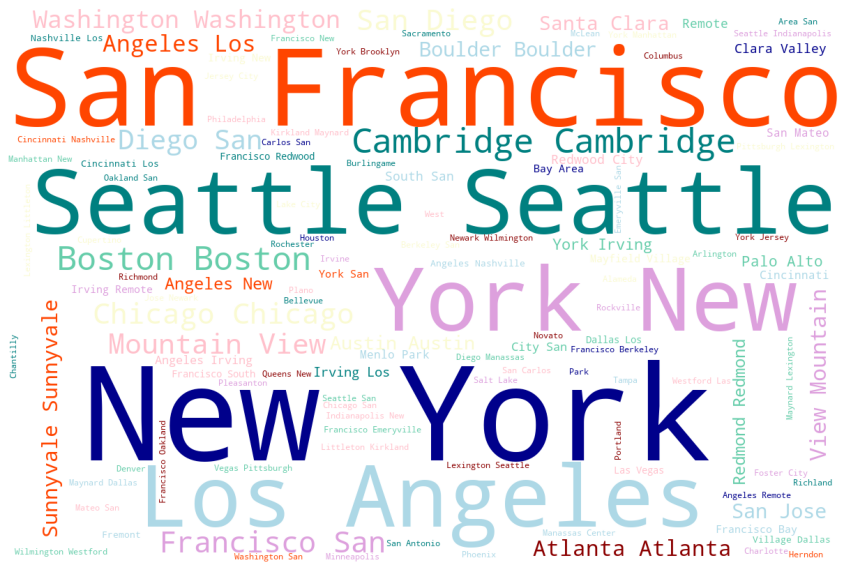

In [ ]:
#@title Select the column to see the word cloud { run: "auto" }
column_name = "City" #@param ["position", "description", "State", "City", "company"]

color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df_group[column_name]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Using NLP to analyse the job description**

In [ ]:
# generating a list of tools

# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']


# another set of keywords that are longer than one word.
tool_keywords2 = set(['amazon web services', 'google cloud', 'sql server'])

In [ ]:
# generating a list of skills

# hard skills/knowledge required.
skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#',
 'regression', 'logistic', 'nn', 'cnn', 'glm',
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes'])


# another set of keywords that are longer than one word.
skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction', 
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])

In [ ]:
# generating a dictionary of degrees

degree_dict = {'bs': 1, 'bachelor': 1, 'undergraduate': 1, 
               'master': 2, 'graduate': 2, 'mba': 2.5, 
               'phd': 3, 'ph.d': 3, 'ba': 1, 'ma': 2,
               'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}


degree_dict2 = {'advanced degree': 2, 'ms or': 2, 'ms degree': 2, '4 year degree': 1, 'bs/': 1, 'ba/': 1,
                '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'phd/': 3, 'ph.d.': 3, 'ms/': 2,
                'm.s/': 2, 'm.s./': 2, 'msc/': 2, 'master/': 2, 'master\'s/': 2, 'bachelor\s/': 1}
degree_keywords2 = set(degree_dict2.keys())

In [ ]:
# converting the data type of the description to string 

df_group['description'].astype(str)

0        about live objects\nlive objects delivers cont...
1        the senior data scientist, fp&a role is primar...
2        **u.s. citizens and those authorized to work i...
3        summary\nposted: jul 29, 2020\nrole number:200...
4        at sisu, we're building a software platform th...
                               ...                        
14703    covid-19 continues to significantly impact our...
14705    docugami uses powerful artificial intelligence...
14706     stratus’ edge computing platforms enables ot,...
14709    primary responsibilities to include:\n\ndesign...
14710    lightcast is looking for a skilled software en...
Name: description, Length: 13194, dtype: object

In [ ]:
# observing the first 5 dexcriptions

df_group['description'].iloc[5:]

5        the database administrator is responsible for ...
6        the role\nas a member of the autopilot ai team...
7        skydio is the world leader in autonomous fligh...
8        company description\n\nsquare builds common bu...
9        polarr is looking for data engineer to ensure ...
                               ...                        
14703    covid-19 continues to significantly impact our...
14705    docugami uses powerful artificial intelligence...
14706     stratus’ edge computing platforms enables ot,...
14709    primary responsibilities to include:\n\ndesign...
14710    lightcast is looking for a skilled software en...
Name: description, Length: 13189, dtype: object

In [ ]:
# sample tokenizing

word_tokenize(df_group['description'].iloc[5])

In [ ]:
# tagging the tool key words list 

pos_tag(tool_keywords1)

[('python', 'NN'),
 ('pytorch', 'NN'),
 ('sql', 'JJ'),
 ('mxnet', 'NN'),
 ('mlflow', 'NN'),
 ('einstein', 'NN'),
 ('theano', 'NN'),
 ('pyspark', 'NN'),
 ('solr', 'NN'),
 ('mahout', 'NN'),
 ('cassandra', 'NN'),
 ('aws', 'VBZ'),
 ('powerpoint', 'JJ'),
 ('spark', 'NN'),
 ('pig', 'NN'),
 ('sas', 'NN'),
 ('java', 'NN'),
 ('nosql', 'JJ'),
 ('docker', 'NN'),
 ('salesforce', 'NN'),
 ('scala', 'NN'),
 ('r', 'NN'),
 ('c', 'VBP'),
 ('c++', 'JJ'),
 ('net', 'JJ'),
 ('tableau', 'NN'),
 ('pandas', 'NN'),
 ('scikitlearn', 'NN'),
 ('sklearn', 'NN'),
 ('matlab', 'NN'),
 ('scala', 'NN'),
 ('keras', 'NNS'),
 ('tensorflow', 'JJ'),
 ('clojure', 'NN'),
 ('caffe', 'NN'),
 ('scipy', 'NN'),
 ('numpy', 'JJ'),
 ('matplotlib', 'NN'),
 ('vba', 'NN'),
 ('spss', 'NN'),
 ('linux', 'JJ'),
 ('azure', 'NN'),
 ('cloud', 'NN'),
 ('gcp', 'NN'),
 ('mongodb', 'NN'),
 ('mysql', 'NN'),
 ('oracle', 'NN'),
 ('redshift', 'NN'),
 ('snowflake', 'VBP'),
 ('kafka', 'NN'),
 ('javascript', 'NN'),
 ('qlik', 'NN'),
 ('jupyter', 'NN'),
 ('

In [ ]:

ps = PorterStemmer()


# process the job description.

def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df_group['job_description_word_set'] = df_group['description'].map(prepare_job_desc)

# process the keywords

# stem the keywords (since the job description is also stemmed.)
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1]) 

# use this dictionary to revert the stemmed words back to the original.
tool_keywords1_dict = {ps.stem(tok):tok for tok in tool_keywords1} 

skill_keywords1_set = set([ps.stem(tok) for tok in skill_keywords1])
skill_keywords1_dict = {ps.stem(tok):tok for tok in skill_keywords1}

degree_keywords1_set = set([ps.stem(tok) for tok in degree_dict.keys()])
degree_keywords1_dict = {ps.stem(tok):tok for tok in degree_dict.keys()}

In [ ]:
df_group['job_description_word_set']

0        {integr, candid, continu, relev, sap, statist,...
1        {candid, ts, statist, interact, system, issu, ...
2        {minimum, troubleshoot, relev, server, rang, i...
3        {experi, scientist, technic, area, fundament, ...
4        {nation, integr, relev, statist, interact, rea...
                               ...                        
14703    {nation, verbal, system, experi, master, instr...
14705    {leav, nation, candid, statist, rang, system, ...
14706    {provid, ’, continu, emerg, experi, enabl, htt...
14709    {candid, continu, verbal, experi, concept, def...
14710    {’, candid, e, text, addit, data, system, expe...
Name: job_description_word_set, Length: 13194, dtype: object

In [ ]:
# initiating the lists for tools, skills and degree
tool_list = []
skill_list = []
degree_list = []

# Using this we can filter data, but for now I am using the entire data

msk = df_group['company'] != ''  
 
# taking the length of the data to a variable
num_postings = len(df_group[msk].index)

# This loop will iterate to each description of the data 
for i in range(num_postings):

    # making the data case sensitive
    job_desc = df_group[msk].iloc[i]['description'].lower()
    job_desc_set = df_group[msk].iloc[i]['job_description_word_set']
    
    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords1_set.intersection(job_desc_set)
    skill_words = skill_keywords1_set.intersection(job_desc_set)
    degree_words = degree_keywords1_set.intersection(job_desc_set)
    
    # check if longer keywords (more than one word) are in the job description. Match by substring.
    j = 0
    for tool_keyword2 in tool_keywords2:
        # tool keywords.
        if tool_keyword2 in job_desc:
            tool_list.append(tool_keyword2)
            j += 1
    
    k = 0
    for skill_keyword2 in skill_keywords2:
        # skill keywords.
        if skill_keyword2 in job_desc:
            skill_list.append(skill_keyword2)
            k += 1
            
       # search for the minimum education.
    min_education_level = 999
    for degree_word in degree_words:
        level = degree_dict[degree_keywords1_dict[degree_word]]
        min_education_level = min(min_education_level, level)
    
    for degree_keyword2 in degree_keywords2:
        # longer keywords. Match by substring.
        if degree_keyword2 in job_desc:
            level = degree_dict2[degree_keyword2]
            min_education_level = min(min_education_level, level)
    
    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0 and j == 0:
        tool_list.append('nothing specified')
    
    # label the job descriptions without any skill keywords.
    if len(skill_words) == 0 and k == 0:
        skill_list.append('nothing specified')
    
    # If none of the keywords were found, but the word degree is present, then assume it's a bachelors level.
    if min_education_level > 500:
        if 'degree' in job_desc:
            min_education_level = 1
    
    # appending the results to the lists created for each iteration 

    tool_list += list(tool_words)
    skill_list += list(skill_words)
    degree_list.append(min_education_level)

<ipython-input-45-a386839b0349>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-45-a386839b0349>:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-45-a386839b0349>:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
# creating the data frame with the lists
df_tool = pd.DataFrame(data={'cnt': tool_list})
df_tool = df_tool.replace(tool_keywords1_dict)

# group some of the categories together.
msk = df_tool['cnt'] == 'h20'
df_tool.loc[msk, 'cnt'] = 'h2o'

msk = df_tool['cnt'] == 'aws'
df_tool.loc[msk, 'cnt'] = 'amazon web services'

msk = df_tool['cnt'] == 'gcp'
df_tool.loc[msk, 'cnt'] = 'google cloud'

msk = df_tool['cnt'] == 'github'
df_tool.loc[msk, 'cnt'] = 'git'

msk = df_tool['cnt'] == 'postgressql'
df_tool.loc[msk, 'cnt'] = 'postgres'

msk = df_tool['cnt'] == 'tensor'
df_tool.loc[msk, 'cnt'] = 'tensorflow'

df_tool_top50 = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:50]

In [ ]:
# Visualizing the tools

layout = dict(
    title='Tools in trending',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top50['tool'],
    y=df_tool_top50['cnt']/num_postings
))

fig.show()

In [ ]:
# creating a dataframe for skills

df_skills = pd.DataFrame(data={'cnt': skill_list})
df_skills = df_skills.replace(skill_keywords1_dict)

# group some of the categories together.
msk = df_skills['cnt'] == 'nlp'
df_skills.loc[msk, 'cnt'] = 'natural language processing'

msk = df_skills['cnt'] == 'convolutional'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'cnn'
df_skills.loc[msk, 'cnt'] = 'convolutional neural network'

msk = df_skills['cnt'] == 'recurrent'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'rnn'
df_skills.loc[msk, 'cnt'] = 'recurrent neural network'

msk = df_skills['cnt'] == 'knn'
df_skills.loc[msk, 'cnt'] = 'nearest neighbors'

msk = df_skills['cnt'] == 'svm'
df_skills.loc[msk, 'cnt'] = 'support vector machine'

msk = df_skills['cnt'] == 'machine vision'
df_skills.loc[msk, 'cnt'] = 'computer vision'

msk = df_skills['cnt'] == 'ab testing'
df_skills.loc[msk, 'cnt'] = 'a/b testing'

df_skills_top50 = df_skills['cnt'].value_counts().reset_index().rename(columns={'index': 'skill'}).iloc[:50]

In [ ]:
# Visualizing the skills.
layout = dict(
    title='Skills in Trending',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_skills_top50['skill'],
    y=df_skills_top50['cnt']/num_postings
))

fig.show()

In [ ]:
# reating a data frame for degree list.
df_degrees = pd.DataFrame(data={'cnt': degree_list})
df_degrees['degree_type'] = ''


msk = df_degrees['cnt'] == 1
df_degrees.loc[msk, 'degree_type'] = 'bachelors'

msk = df_degrees['cnt'] == 2
df_degrees.loc[msk, 'degree_type'] = 'masters'

msk = df_degrees['cnt'] == 3
df_degrees.loc[msk, 'degree_type'] = 'phd'

msk = df_degrees['cnt'] == 4
df_degrees.loc[msk, 'degree_type'] = 'postdoc'

msk = df_degrees['cnt'] == 2.5
df_degrees.loc[msk, 'degree_type'] = 'mba'

msk = df_degrees['cnt'] > 500
df_degrees.loc[msk, 'degree_type'] = 'not specified'


df_degree_cnt = df_degrees['degree_type'].value_counts().reset_index().rename(columns={'index': 'degree'}).iloc[:50]

In [ ]:
# visualizing the degrees.
layout = dict(
    title='Minimum Education for a Job',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_degree_cnt['degree'],
    y=df_degree_cnt['degree_type']/num_postings
))

fig.show()